# Инициализация проекта

## Загрузка библиотек и объявление функций

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [67]:
def fillna_cat_features(df, cat_column):
    df[cat_column] = df[cat_column].fillna(df[cat_column].mode()[0])

def float_to_int(df, float_column, type_of_int):
    df[float_column] = df[float_column].astype(type_of_int)

## Загрузка данных

In [68]:
data = pd.read_csv('mumbai_houses_task.csv')

# Исследование исходных данных

Датасет содержит следующие поля:

1. price: Цена объекта недвижимости.

2. area: Площадь объекта недвижимости.

3. latitude: Географическая широта местоположения объекта.

4. longitude: Географическая долгота местоположения объекта.

5. Bedrooms: Количество спален в объекте.

6. Bathrooms: Количество ванных комнат.

7. Balcony: Количество балконов.

8. Status: Состояние объекта (строится, готов к сдаче).

9. neworold: Классификация по возрасту (новостройка/вторичное жилье).

10. parking: Количество парковок.

11. Furnished_status: Статус меблировки (меблированный/немеблированный или частично меблированный).

12. Lift: Количество лифтов в здании.

13. typeofbuilding: Тип здания (квартирный, частный дом).



In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   float64
 1   area              6255 non-null   float64
 2   latitude          6255 non-null   float64
 3   longitude         6255 non-null   float64
 4   Bedrooms          6255 non-null   float64
 5   Bathrooms         6255 non-null   float64
 6   Balcony           6255 non-null   float64
 7   Status            5774 non-null   object 
 8   neworold          6255 non-null   object 
 9   parking           6255 non-null   float64
 10  Furnished_status  3600 non-null   object 
 11  Lift              6255 non-null   float64
 12  type_of_building  6255 non-null   object 
dtypes: float64(9), object(4)
memory usage: 635.4+ KB


In [70]:
data.head(10)

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,Under Construction,New Property,0.0,NaN,0.0,Flat
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,2.0,NaN,2.0,Flat
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,NaN,New Property,0.0,Unfurnished,0.0,Flat
5,13000000.0,630.0,19.148058,72.937725,2.0,2.0,0.0,NaN,New Property,0.0,Unfurnished,0.0,Flat
6,20700000.0,1188.0,19.154919,72.843566,2.0,2.0,2.0,NaN,New Property,2.0,Semi-Furnished,2.0,Flat
7,22900000.0,968.0,19.147269,72.848351,3.0,3.0,0.0,NaN,New Property,0.0,Unfurnished,0.0,Flat
8,17000000.0,820.0,19.015128,72.858064,2.0,2.0,0.0,NaN,New Property,0.0,Unfurnished,0.0,Flat
9,81000000.0,3260.0,19.001640,72.826532,3.0,3.0,3.0,Ready to Move,Resale,3.0,NaN,3.0,Flat


<font size=4><b>Получили следующую характеристику исходных данных:</b>

- в столбцах 'Status', 'Furnished_status' отсутствуют значения;
- тип данных столбца 'Bedrooms', 'Bathrooms', 'Balcony', 'parking', 'Lift' нужно перевести в целочисленный;</font>

## Обработка пропусков

In [71]:
data.isna().sum()

price                  0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony                0
Status               481
neworold               0
parking                0
Furnished_status    2655
Lift                   0
type_of_building       0
dtype: int64

Можем заметить где у нас пропуски: Status, Furnished_status. Так как это категориальные признаки, то заменим пропущенные значения модой

In [72]:
print(data['Status'].unique())
print(data['Furnished_status'].unique())

['Under Construction' 'Ready to Move' nan]
[nan 'Unfurnished' 'Semi-Furnished' 'Furnished']


In [73]:
fillna_cat_features(data, 'Status')
fillna_cat_features(data, 'Furnished_status')

In [74]:
print(data['Status'].unique())
print(data['Furnished_status'].unique())

['Under Construction' 'Ready to Move']
['Unfurnished' 'Semi-Furnished' 'Furnished']


In [75]:
data.isna().sum()

price               0
area                0
latitude            0
longitude           0
Bedrooms            0
Bathrooms           0
Balcony             0
Status              0
neworold            0
parking             0
Furnished_status    0
Lift                0
type_of_building    0
dtype: int64

## Коррекция типов данных

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   float64
 1   area              6255 non-null   float64
 2   latitude          6255 non-null   float64
 3   longitude         6255 non-null   float64
 4   Bedrooms          6255 non-null   float64
 5   Bathrooms         6255 non-null   float64
 6   Balcony           6255 non-null   float64
 7   Status            6255 non-null   object 
 8   neworold          6255 non-null   object 
 9   parking           6255 non-null   float64
 10  Furnished_status  6255 non-null   object 
 11  Lift              6255 non-null   float64
 12  type_of_building  6255 non-null   object 
dtypes: float64(9), object(4)
memory usage: 635.4+ KB


In [77]:
data.describe()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift
count,6.255000e+03,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000
mean,2.684187e+07,1185.625260,19.156772,72.868642,2.452278,2.425580,0.821583,0.821583,0.821583
std,2.788831e+07,636.973259,0.109447,0.058614,0.749534,0.762604,1.291957,1.291957,1.291957
min,1.500000e+06,503.000000,18.873713,72.754080,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000e+07,846.500000,19.081509,72.832930,2.000000,2.000000,0.000000,0.000000,0.000000
50%,1.900000e+07,1000.000000,19.147269,72.858019,2.000000,2.000000,0.000000,0.000000,0.000000
75%,3.000000e+07,1300.000000,19.213054,72.884691,3.000000,3.000000,1.000000,1.000000,1.000000
max,3.600000e+08,8000.000000,19.476239,73.197823,10.000000,10.000000,8.000000,8.000000,8.000000


Можно заметить, что наши фичи Bedrooms, Bathrooms, Balcony, parking, Lift - вещественные переменные, их нужно преобразовать в тип int так как он занимает меньше памяти. Преобразуем в тип - int8, так как наш максимум это 10.

In [78]:
for column in data.describe().columns[4:].to_list():
    float_to_int(data, column, 'int8')

In [79]:
data

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building
0,22400000.0,629.0,19.032800,72.896357,2,2,0,Under Construction,New Property,0,Unfurnished,0,Flat
1,35000000.0,974.0,19.032800,72.896357,3,2,0,Under Construction,New Property,0,Unfurnished,0,Flat
2,31700000.0,968.0,19.085600,72.909277,3,3,0,Under Construction,New Property,0,Unfurnished,0,Flat
3,18700000.0,629.0,19.155756,72.846862,2,2,2,Ready to Move,New Property,2,Unfurnished,2,Flat
4,13500000.0,1090.0,19.177555,72.849887,2,2,0,Ready to Move,New Property,0,Unfurnished,0,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,19500000.0,810.0,19.138320,72.810020,2,2,0,Ready to Move,Resale,0,Semi-Furnished,0,Flat
6251,22000000.0,1400.0,19.221920,72.854250,3,3,1,Ready to Move,Resale,1,Unfurnished,1,Flat
6252,20000000.0,750.0,19.144320,72.824111,2,2,0,Ready to Move,Resale,0,Unfurnished,0,Flat
6253,11000000.0,700.0,19.047201,72.872225,2,2,0,Ready to Move,Resale,0,Furnished,0,Flat


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   float64
 1   area              6255 non-null   float64
 2   latitude          6255 non-null   float64
 3   longitude         6255 non-null   float64
 4   Bedrooms          6255 non-null   int8   
 5   Bathrooms         6255 non-null   int8   
 6   Balcony           6255 non-null   int8   
 7   Status            6255 non-null   object 
 8   neworold          6255 non-null   object 
 9   parking           6255 non-null   int8   
 10  Furnished_status  6255 non-null   object 
 11  Lift              6255 non-null   int8   
 12  type_of_building  6255 non-null   object 
dtypes: float64(4), int8(5), object(4)
memory usage: 421.6+ KB


## Обогащение данных

In [81]:
data

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building
0,22400000.0,629.0,19.032800,72.896357,2,2,0,Under Construction,New Property,0,Unfurnished,0,Flat
1,35000000.0,974.0,19.032800,72.896357,3,2,0,Under Construction,New Property,0,Unfurnished,0,Flat
2,31700000.0,968.0,19.085600,72.909277,3,3,0,Under Construction,New Property,0,Unfurnished,0,Flat
3,18700000.0,629.0,19.155756,72.846862,2,2,2,Ready to Move,New Property,2,Unfurnished,2,Flat
4,13500000.0,1090.0,19.177555,72.849887,2,2,0,Ready to Move,New Property,0,Unfurnished,0,Flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,19500000.0,810.0,19.138320,72.810020,2,2,0,Ready to Move,Resale,0,Semi-Furnished,0,Flat
6251,22000000.0,1400.0,19.221920,72.854250,3,3,1,Ready to Move,Resale,1,Unfurnished,1,Flat
6252,20000000.0,750.0,19.144320,72.824111,2,2,0,Ready to Move,Resale,0,Unfurnished,0,Flat
6253,11000000.0,700.0,19.047201,72.872225,2,2,0,Ready to Move,Resale,0,Furnished,0,Flat


Сделаем новый призак, который будет характеризовать стоимость за единицу площади.

In [82]:
data['price_per_unit_area'] = data['price'] / data['area']
data['price_per_unit_area'].head()

0    35612.082671
1    35934.291581
2    32747.933884
3    29729.729730
4    12385.321101
Name: price_per_unit_area, dtype: float64

Заметим в наших признаках 'Furnished_status' и 'neworold' можно сделать иерархию, то есть привести номинальные перемнные в ранговые через OrdinalEncoder

In [83]:
ordinal_encoder_feature1 = OrdinalEncoder(categories=[['Unfurnished', 'Semi-Furnished', 'Furnished']])
ordinal_encoder_feature2 = OrdinalEncoder(categories=[['Resale', 'New Property']])

In [84]:
data['Furnished_status'] = ordinal_encoder_feature1.fit_transform(data[['Furnished_status']])
data['neworold'] = ordinal_encoder_feature2.fit_transform(data[['neworold']])

Так как у нас тип float, то преобразуем наш тип в int8

In [85]:
data['Furnished_status'] = data['Furnished_status'].astype('int8')
data['neworold'] = data['neworold'].astype('int8')

Далее применим к нашим категориальным данным, в которых нет иерархии, One-hot кодирование

In [86]:
data = pd.get_dummies(data=data)

## Проверка "очищенных" данных

Проверим наличие дубликатов

In [87]:
data.duplicated().sum()

18

In [88]:
data.drop_duplicates(inplace=True)

In [89]:
data.duplicated().sum()

0

Мы удалили повторяющиеся данные

In [90]:
data.head(10)

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,neworold,parking,Furnished_status,Lift,price_per_unit_area,Status_Ready to Move,Status_Under Construction,type_of_building_Flat,type_of_building_Individual House
0,22400000.0,629.0,19.032800,72.896357,2,2,0,1,0,0,0,35612.082671,False,True,True,False
1,35000000.0,974.0,19.032800,72.896357,3,2,0,1,0,0,0,35934.291581,False,True,True,False
2,31700000.0,968.0,19.085600,72.909277,3,3,0,1,0,0,0,32747.933884,False,True,True,False
3,18700000.0,629.0,19.155756,72.846862,2,2,2,1,2,0,2,29729.729730,True,False,True,False
4,13500000.0,1090.0,19.177555,72.849887,2,2,0,1,0,0,0,12385.321101,True,False,True,False
5,13000000.0,630.0,19.148058,72.937725,2,2,0,1,0,0,0,20634.920635,True,False,True,False
6,20700000.0,1188.0,19.154919,72.843566,2,2,2,1,2,1,2,17424.242424,True,False,True,False
7,22900000.0,968.0,19.147269,72.848351,3,3,0,1,0,0,0,23657.024793,True,False,True,False
8,17000000.0,820.0,19.015128,72.858064,2,2,0,1,0,0,0,20731.707317,True,False,True,False
9,81000000.0,3260.0,19.001640,72.826532,3,3,3,0,3,0,3,24846.625767,True,False,True,False


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6237 entries, 0 to 6254
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              6237 non-null   float64
 1   area                               6237 non-null   float64
 2   latitude                           6237 non-null   float64
 3   longitude                          6237 non-null   float64
 4   Bedrooms                           6237 non-null   int8   
 5   Bathrooms                          6237 non-null   int8   
 6   Balcony                            6237 non-null   int8   
 7   neworold                           6237 non-null   int8   
 8   parking                            6237 non-null   int8   
 9   Furnished_status                   6237 non-null   int8   
 10  Lift                               6237 non-null   int8   
 11  price_per_unit_area                6237 non-null   float64
 1

# EDA

In [92]:
target = ['price']

In [93]:
num_features = ['area', 'latitude', 'longitude', 'Bedrooms', 'Bathrooms',
       'Balcony', 'parking', 'Lift', 'price_per_unit_area']

In [94]:
ranked_features = ['neworold', 'Furnished_status']

Для начала рассмотрим вещественные признаки

In [95]:
data[num_features].describe()

,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,price_per_unit_area
count,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000,6237.000000
mean,1185.597723,19.156677,72.868661,2.452301,2.425525,0.822350,0.822350,0.822350,21434.273898
std,637.515522,0.109459,0.058669,0.750140,0.763236,1.291977,1.291977,1.291977,12703.814685
min,503.000000,18.873713,72.754080,2.000000,0.000000,0.000000,0.000000,0.000000,1500.000000
25%,846.000000,19.081509,72.832930,2.000000,2.000000,0.000000,0.000000,0.000000,13714.285714
50%,1000.000000,19.147240,72.858017,2.000000,2.000000,0.000000,0.000000,0.000000,19285.714286
75%,1300.000000,19.213053,72.884691,3.000000,3.000000,1.000000,1.000000,1.000000,26545.454545
max,8000.000000,19.476239,73.197823,10.000000,10.000000,8.000000,8.000000,8.000000,119047.619048


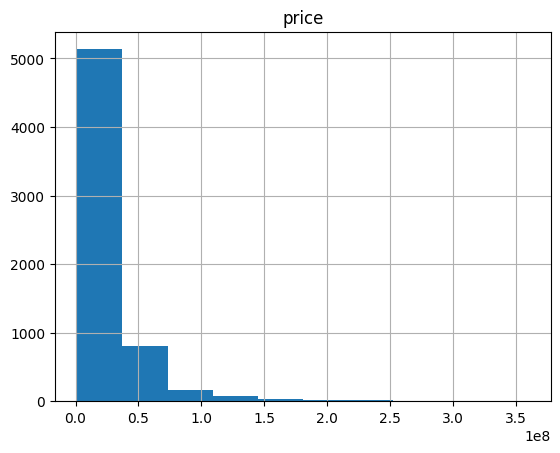

In [96]:
data.hist(column='price')
plt.show()

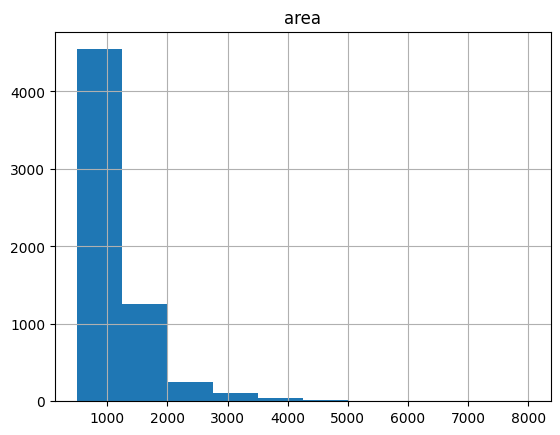

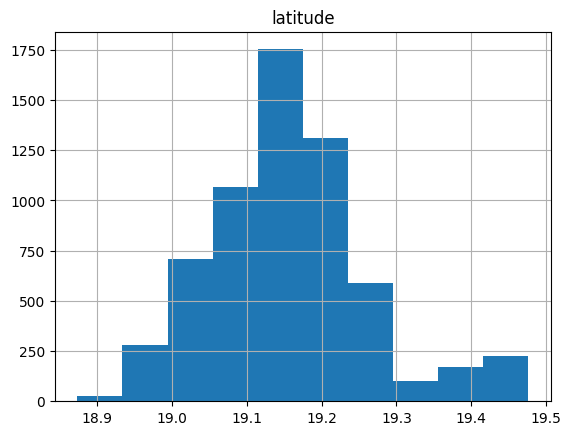

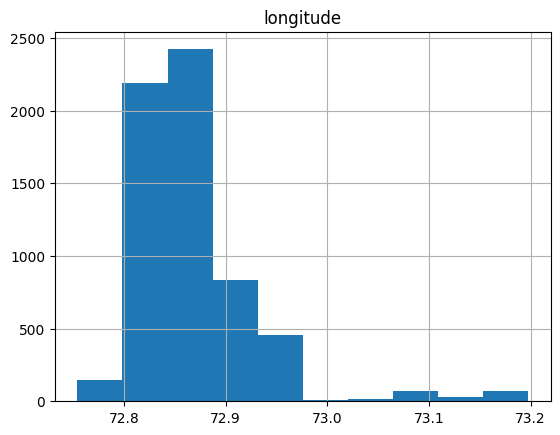

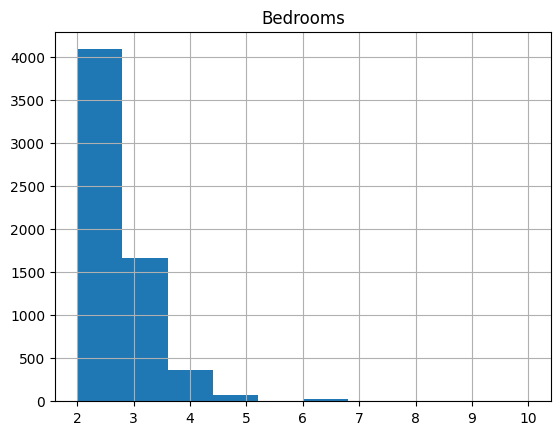

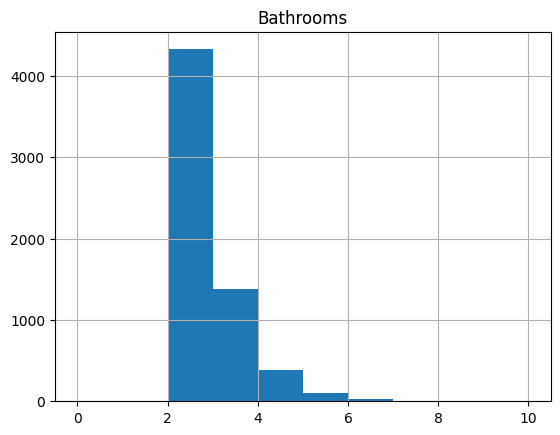

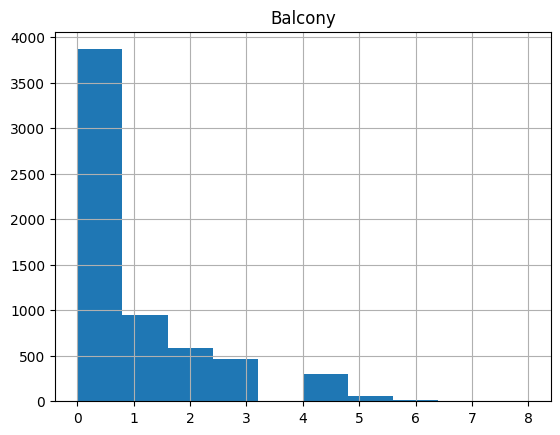

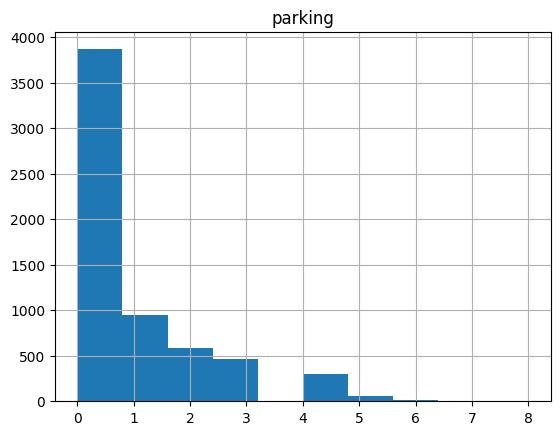

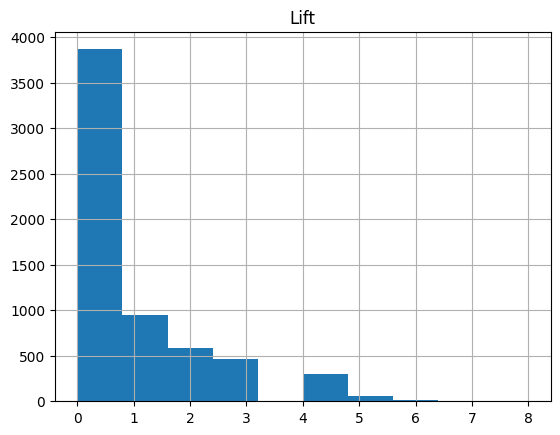

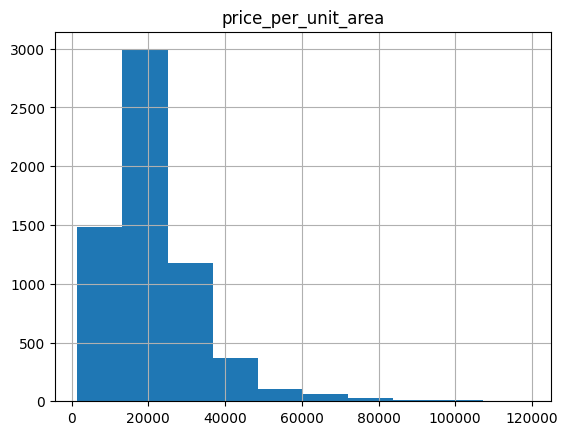

In [97]:
for column in num_features:
    data.hist(column)
    plt.show()


**Заключение:**
- выбросы затрудняют чтение данных о площади, цены и цены за единицу площади;
- на гистограмме данные площади, цены и цены за единицу площади смещены вправо;
- тогда среднее значение обычно БОЛЬШЕ медианы.

## Изучение и обраюотка выбросов

Учитывая приведенные выше результаты, столбцы, содержащие выбросы, — это 'price', 'area' и 'price_per_unit_area'. Создадим DataFrame без этих выбросов. Выбросы можно идентифицировать путем определения нижнего/верхнего предела нормального диапазона значений.

In [98]:
# Определить по приведенной выше гистограмме столбцы, содержащие выбросы: 'price', 'area' и 'price_per_unit_area'.
# Создать Dataframe на основе столбцов с выбросами
outlier = data[['price','area','price_per_unit_area']]
outlier

,price,area,price_per_unit_area
0,22400000.0,629.0,35612.082671
1,35000000.0,974.0,35934.291581
2,31700000.0,968.0,32747.933884
3,18700000.0,629.0,29729.729730
4,13500000.0,1090.0,12385.321101
...,...,...,...
6250,19500000.0,810.0,24074.074074
6251,22000000.0,1400.0,15714.285714
6252,20000000.0,750.0,26666.666667
6253,11000000.0,700.0,15714.285714


In [99]:
# Определить нижние пределы для выбросов
Q1 = outlier.quantile(0.25)
Q1

price                  1.300000e+07
area                   8.460000e+02
price_per_unit_area    1.371429e+04
Name: 0.25, dtype: float64

In [100]:
# Определить верхние пределы выбросов
Q3 = outlier.quantile(0.75)
Q3

price                  3.000000e+07
area                   1.300000e+03
price_per_unit_area    2.654545e+04
Name: 0.75, dtype: float64

In [101]:
# IQR-оценки
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,price,area,price_per_unit_area
0,22400000.0,629.0,35612.082671
1,35000000.0,974.0,35934.291581
2,31700000.0,968.0,32747.933884
3,18700000.0,629.0,29729.729730
4,13500000.0,1090.0,12385.321101
...,...,...,...
6250,19500000.0,810.0,24074.074074
6251,22000000.0,1400.0,15714.285714
6252,20000000.0,750.0,26666.666667
6253,11000000.0,700.0,15714.285714


In [102]:
# Копирование индексов
index_list = list(data_filtered.index)

In [103]:
# Хранить данные без выбросов в отдельном DataFrame.
data_filtered = data[data.index.isin(index_list)]
data_filtered

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,neworold,parking,Furnished_status,Lift,price_per_unit_area,Status_Ready to Move,Status_Under Construction,type_of_building_Flat,type_of_building_Individual House
0,22400000.0,629.0,19.032800,72.896357,2,2,0,1,0,0,0,35612.082671,False,True,True,False
1,35000000.0,974.0,19.032800,72.896357,3,2,0,1,0,0,0,35934.291581,False,True,True,False
2,31700000.0,968.0,19.085600,72.909277,3,3,0,1,0,0,0,32747.933884,False,True,True,False
3,18700000.0,629.0,19.155756,72.846862,2,2,2,1,2,0,2,29729.729730,True,False,True,False
4,13500000.0,1090.0,19.177555,72.849887,2,2,0,1,0,0,0,12385.321101,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,19500000.0,810.0,19.138320,72.810020,2,2,0,0,0,1,0,24074.074074,True,False,True,False
6251,22000000.0,1400.0,19.221920,72.854250,3,3,1,0,1,0,1,15714.285714,True,False,True,False
6252,20000000.0,750.0,19.144320,72.824111,2,2,0,0,0,0,0,26666.666667,True,False,True,False
6253,11000000.0,700.0,19.047201,72.872225,2,2,0,0,0,2,0,15714.285714,True,False,True,False


Новая переменная сохранила отфильтрованные данные без выбросов. Далее отфильтрованные данные будут использоваться для создания гистограммы.

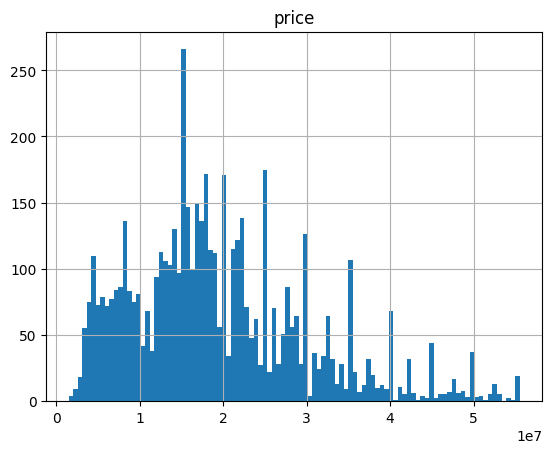

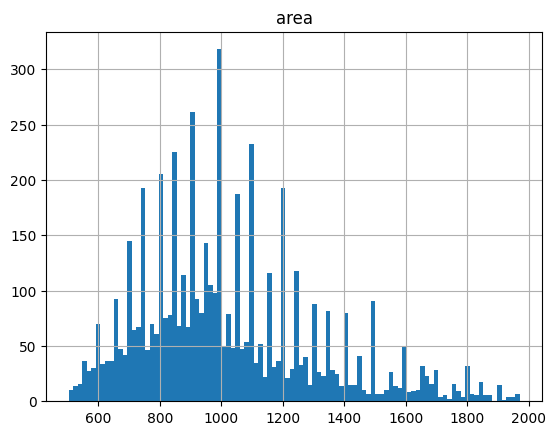

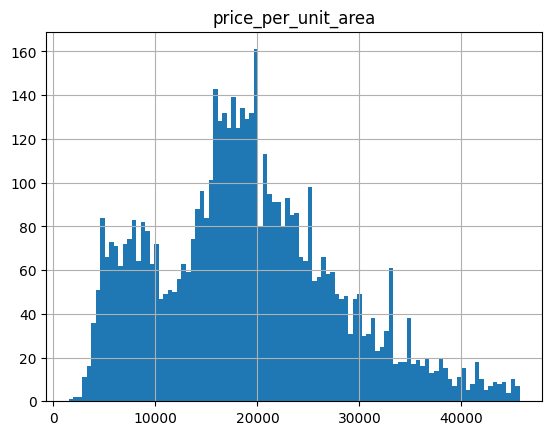

In [104]:
# создать гистограмму с отфильтрованным выбросом
filtered_outlier = data_filtered[['price','area','price_per_unit_area']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

**Заключение:**
- Определили нижний и верхний пределы выбросов, определив 25-й и 75-й процентили. Затем нашли межквартильный размах. Использовали эту информацию для фильтрации выбросов. После удаления выбросов график выглядит более симметричным по сравнению с выбросами, и в данных легче наблюдать среднее значение, медиану и моду.

## Изучение основных параметров без выбросов

В этом разделе отфильтрованные данные будут использоваться для построения новых графиков по сравнению с предыдущими, которые включали выбросы.

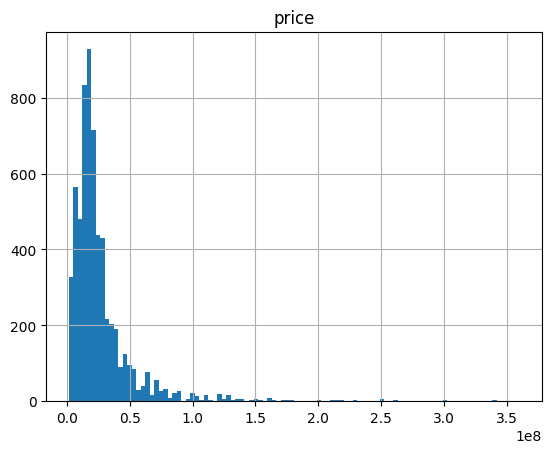

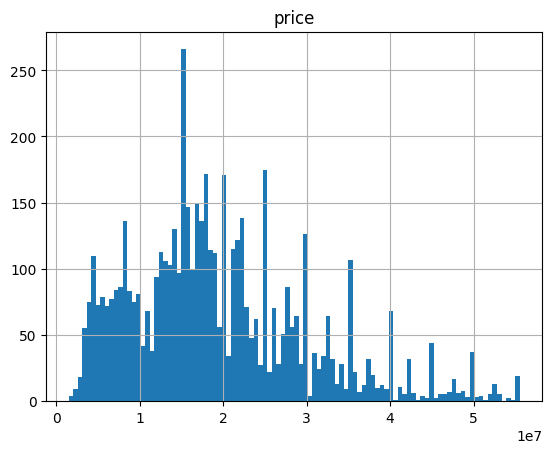

In [105]:
# Сравнение цен с выбросами и без них (гистограмма)
data.hist('price', bins=100)
data_filtered.hist('price', bins=100)
plt.show()

# **Заключение**:
- Ценовой выброс был уменьшен с максимального 350 000 000 до 55 000 000. Гистограммы просты для понимания и могут рассказать многое о ценовых данных. Среднее значение все еще выше медианы, поэтому гистограмма имеет наклон вправо.


- На гистограмме без выбросов видно, что большая часть цен распределена в диапазоне 10 000 000 – 20 000 000. Максимальная цена составляет 55 000 000. Для диапазона более 18 000 000 значение ниже 200 и уменьшается при увеличении цены до 55 000 000. Здесь показано, что  Средняя цена дома в этом диапазоне (10 000 000 – 20 000 000). Если больше среднего, значит, дом можно отнести к категории дорогих.

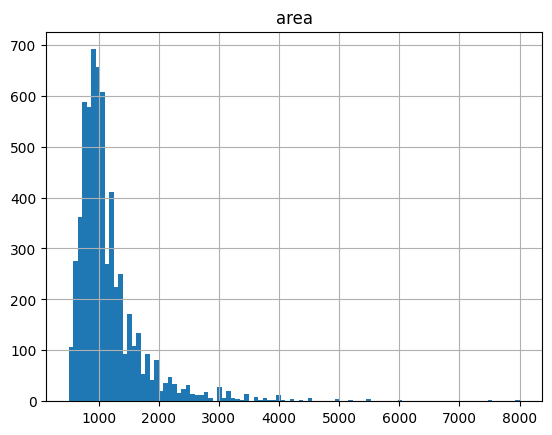

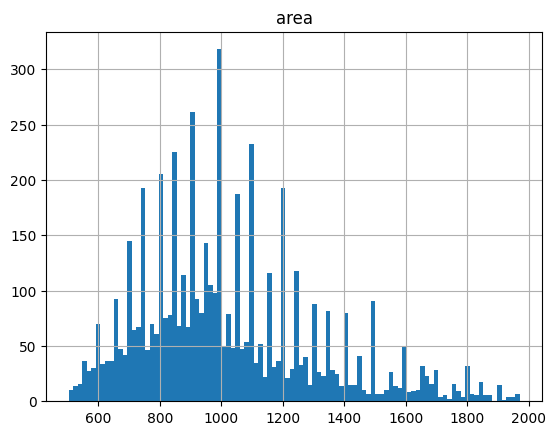

In [106]:
# Сравнение площади дома с выбросами и без них (гистограмма)
data.hist('area', bins=100)
data_filtered.hist('area', bins=100)
plt.show()

**Заключение:**
- Выброс по площади дома был уменьшен с максимума 8000 до 2000. Среднее значение по-прежнему выше медианного, поэтому гистограмма отображается вправо.


- Судя по гистограмме, средняя площадь домов составляет от 800 до 1200. Этот дом в среднем нужен для человека. Если площадь превышает указанный диапазон, дом можно считать роскошным, а если меньше, то дом небольшой и подойдет для человека с небольшой зарплатой.

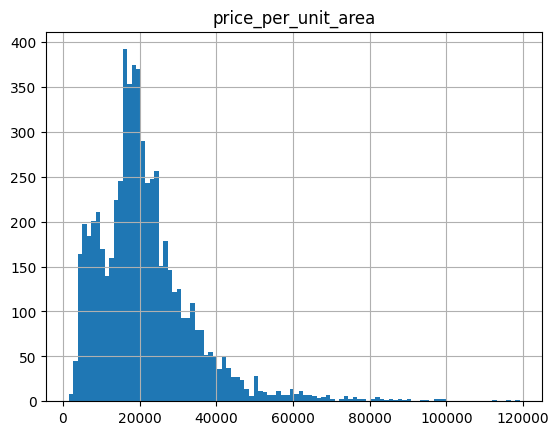

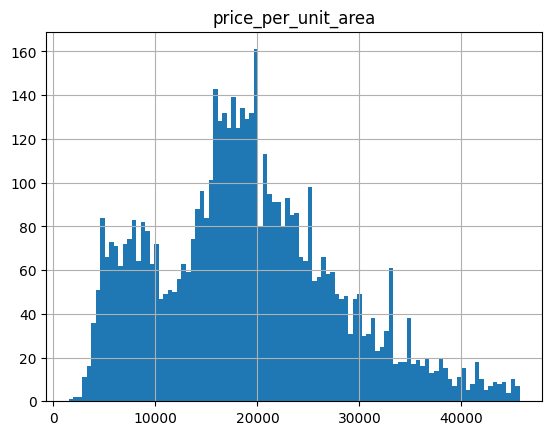

In [107]:
# Сравнение цены за единицу площади с выбросами и без них (гистограмма)
data.hist('price_per_unit_area', bins=100)
data_filtered.hist('price_per_unit_area', bins=100)
plt.show()

## Изучение основных параметров без выбросов

### latitude

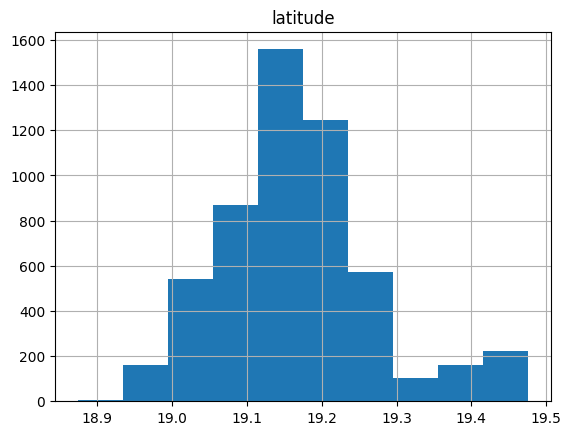

In [108]:
data_filtered.hist('latitude')
plt.show()

In [109]:
# Рассчитать среднее и медианное число на основе столбца 'days_listed'
mean_latitude = data_filtered['latitude'].mean()
median_latitude = data_filtered['latitude'].median()
print(mean_latitude)
print(median_latitude)

19.167640036397685
19.1590077


In [110]:
# Общая информация в столбце 'latitude'
data_filtered['latitude'].describe()

count    5445.000000
mean       19.167640
std         0.107263
min        18.873713
25%        19.100052
50%        19.159008
75%        19.221609
max        19.476239
Name: latitude, dtype: float64

**Заключение:**

- Среднее значение и медиана для широты составляют 19,167 и 19,159. Можем заметить что наше среднее и медиана почти совпадают, о чем говорит что наше распределение почти нормальное. Можно сказать что большинство домов расположено на 19 градусах широты и можно сказать что это скорее всего густонаселенные районы

### longitude

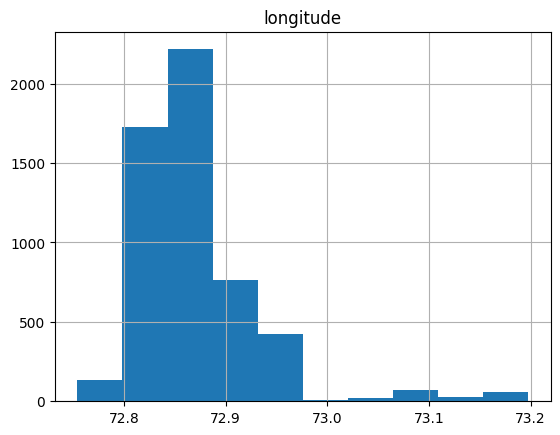

In [111]:
data_filtered.hist('longitude')
plt.show()

In [112]:
# Рассчитать среднее и медианное число на основе столбца 'days_listed'
mean_longitude = data_filtered['longitude'].mean()
median_longitude = data_filtered['longitude'].median()
print(mean_longitude)
print(median_longitude)

72.87132402101172
72.86042022705078


In [113]:
# Общая информация в столбце 'latitude'
data_filtered['longitude'].describe()

count    5445.000000
mean       72.871324
std         0.059648
min        72.754080
25%        72.836128
50%        72.860420
75%        72.887341
max        73.197823
Name: longitude, dtype: float64

**Заключение:**

- Среднее значение и медиана для долготы составляют 72,871 и 72,860. Можно сказать что большинство домов расположено на 72,8 градусах долготы и можно сказать что это скорее всего густонаселенные районы

## Ценовые факторы

В этом разделе будут проанализированы факторы, которые больше всего влияют на цену дома.

Цена зависит от следующих характеристик:

- area<br>
- Bedrooms<br>
- Bathrooms<br>
- Balcony<br>
- neworold	<br>
- Furnished_status
  

In [114]:
corr_price_columns = ['area', 'Bedrooms', 'Bathrooms', 'Balcony', 'Lift']

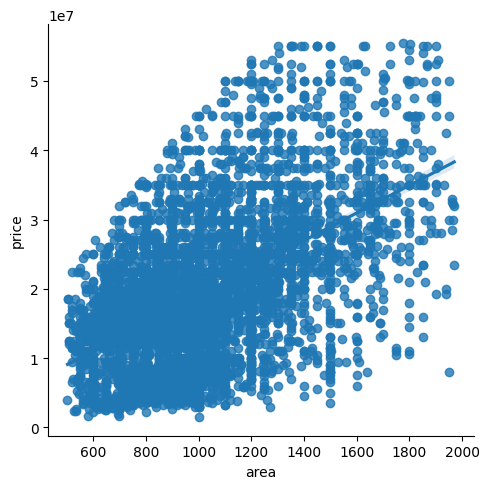

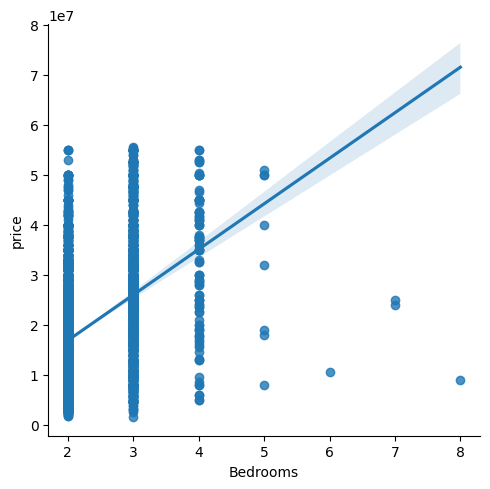

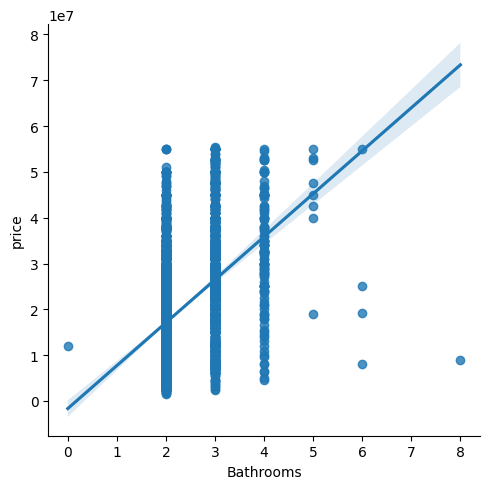

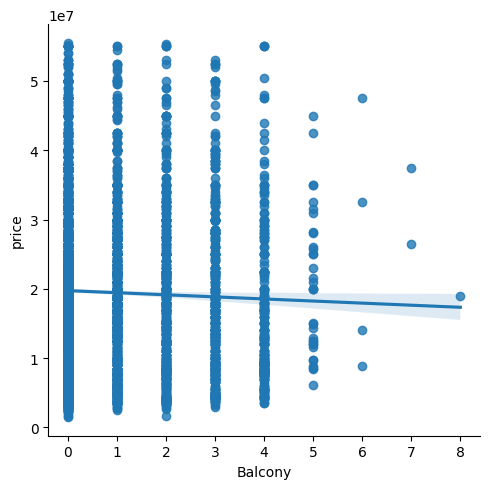

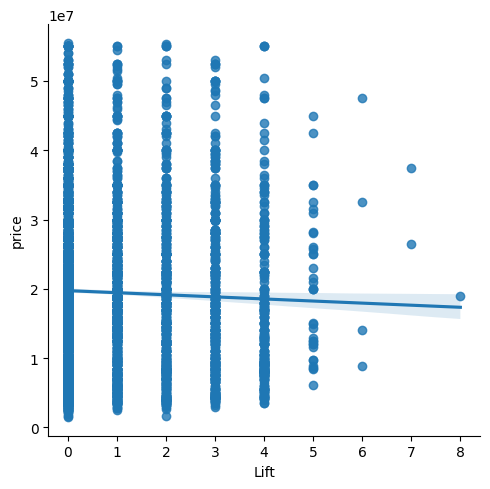

In [115]:
for column in corr_price_columns:
    sns.lmplot(x=column, y="price", data=data_filtered)

**Заключение** :

Можем заменить, что площадь дома, количество спален и ванных комнат очень сильно линейно зависимы с нашей ценой, и при уменьшении этих факторов будет падать цена. Количество балконов и количесво лифтов не сильно влияют на наш таргет

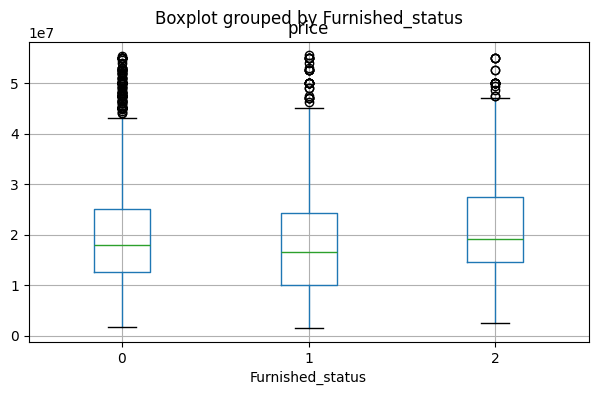

In [116]:
#  boxplot по столбцам 'price' и 'Furnished_status'
data_filtered.boxplot(by ='Furnished_status', column =['price'],figsize=(7,4), grid = True)
plt.show()

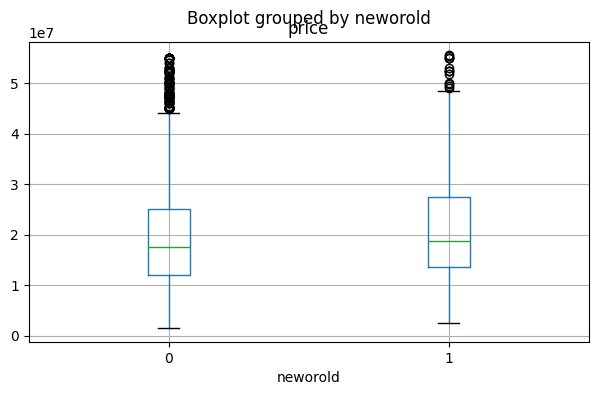

In [117]:
#  boxplot по столбцам 'price' и 'neworold'
data_filtered.boxplot(by ='neworold', column =['price'],figsize=(7,4), grid = True)
plt.show()

Заметим что по нашим графиками ни возраст жилья ни качество мебилировки не влият на нашу стоимость дома, скорее всего эти факторы играют не столь решающую роль

In [118]:
# Матрица корреляции
data_filtered.corr(method='spearman')

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,neworold,parking,Furnished_status,Lift,price_per_unit_area,Status_Ready to Move,Status_Under Construction,type_of_building_Flat,type_of_building_Individual House
price,1.000000,0.491956,-0.612193,-0.069091,0.434777,0.423936,-0.040675,0.049135,-0.040675,0.023766,-0.040675,0.839962,-0.025417,0.025417,0.004567,-0.004567
area,0.491956,1.000000,-0.101655,0.039539,0.580499,0.527924,0.188505,0.038971,0.188505,-0.067988,0.188505,-0.007685,0.013133,-0.013133,0.017347,-0.017347
latitude,-0.612193,-0.101655,1.000000,-0.135271,-0.076451,-0.088032,0.112347,-0.031532,0.112347,-0.052419,0.112347,-0.645956,0.030000,-0.030000,0.021363,-0.021363
longitude,-0.069091,0.039539,-0.135271,1.000000,0.013313,-0.017229,0.031696,0.061851,0.031696,-0.072734,0.031696,-0.103674,-0.025269,0.025269,-0.015886,0.015886
Bedrooms,0.434777,0.580499,-0.076451,0.013313,1.000000,0.749241,0.022213,0.017527,0.022213,0.003810,0.022213,0.150831,-0.020121,0.020121,0.000186,-0.000186
Bathrooms,0.423936,0.527924,-0.088032,-0.017229,0.749241,1.000000,0.032121,0.047186,0.032121,-0.009905,0.032121,0.168758,-0.005335,0.005335,-0.002482,0.002482
Balcony,-0.040675,0.188505,0.112347,0.031696,0.022213,0.032121,1.000000,0.105385,1.000000,-0.125466,1.000000,-0.156989,0.017241,-0.017241,0.034809,-0.034809
neworold,0.049135,0.038971,-0.031532,0.061851,0.017527,0.047186,0.105385,1.000000,0.105385,-0.091358,0.105385,0.036568,-0.064735,0.064735,0.021474,-0.021474
parking,-0.040675,0.188505,0.112347,0.031696,0.022213,0.032121,1.000000,0.105385,1.000000,-0.125466,1.000000,-0.156989,0.017241,-0.017241,0.034809,-0.034809
Furnished_status,0.023766,-0.067988,-0.052419,-0.072734,0.003810,-0.009905,-0.125466,-0.091358,-0.125466,1.000000,-0.125466,0.083413,0.016700,-0.016700,-0.034889,0.034889


In [119]:
data_filtered.to_csv('mumbai_houses.csv', index=False)

# Общие выводы:

Этот проект призван изучить данные, собранные за последние несколько лет, и определить, какие факторы влияют на цену домов в Мумбаи. Вначале, после загрузки данных и всех необходимых библиотек, образцы данных и общее резюме выводятся на экран для их анализа. Необходимо выявить "аномальные" данные, отсутствующие значения и некорректные типы данных.

Заполнить пропущенные значения, сравнив их с другими столбцами (если они связаны):

- Отсутствующее значение столбца 'Status', 'Furnished_status' может быть заполнено с помощью моды.

**Изменение типа данных:**

- Тип данных столбца 'Bedrooms', 'Bathrooms', 'Balcony', 'parking', 'Lift' изменен на тип данных 'int 8';
- Тип данных 'Status', 'neworold' заменил на ранговые переменные типа 'int 8';

**Редактирование данных:**

- Добавил стоимость за единицу площади.
- Проверка дублированных данные и их удаление.


**Проверка выбросов:**

Выбросы параметров: цена, площадь, стоимость за единицу площади.
На гистограмме данные столбцов 'price', 'area' и 'price_per_unit_area' смещены вправо.


**Удаление выбросов:**

- Определили нижний и верхний пределы выбросов и сохранили их в отдельном DataFrame.
- Выполнили сравнение, используя гистограмму данных, которые содержат выбросы и не содержат выбросов. Сравнение показало, что гистограмма без выбросов позволяет легко исследовать среднее, медианное значение в данных столбцов.


**Изучение ценового фактора:**

Факторы, влияющие на цену: площадь дома, количество спален и ванных комнат, количество балконов и лифтов. Для них мы использовали диаграммы рассеивания.


*Площадь дома*

Площадь дома значительно влият на стоимость дома. Коэффициент корреляции положительный, означает, что площадь увеличивается при повышении цены. Большая площадь будет привлекать больше народу и соответственно цена будет расти.

*Количество спален*

Количество спален значительно влият на стоимость дома. Коэффициент корреляции положительный, означает, что количество спален увеличивается при повышении цены. Можно понять что при увеличении количества спален будет увеличиваться площадь и соотвественно увеличиваться цена дома.

*Количество ванных комнат*

Количество ванных комнат значительно влият на стоимость дома. Коэффициент корреляции положительный, означает, что количество ванных комнат увеличивается при повышении цены. Можно понять что при увеличении количества ванных комнат будет увеличиваться площадь и соотвественно увеличиваться цена дома.

*Количество балконов*

Количество балконов незначительно влият на стоимость дома. Коэффициент корреляции положительный, означает, что количество балконов не всегда увеличивается при повышении цены. 

*Количество лифтов*

Количество лифтов незначительно влият на стоимость дома. Коэффициент корреляции положительный, означает, что количество лифтов не всегда увеличивается при повышении цены. 